In [1]:
cd ../../../

/Users/flamholz/Documents/workspace/human_impacts


In [2]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

import anthro.viz
colors = anthro.viz.plotting_style()
colors

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

In [5]:
co2_budget_df = pd.read_csv('data/atmosphere_biogeochemistry/global_carbon_project_CO2/processed/global_carbon_budget_processed.csv')

mask = co2_budget_df.Year == 2018

current_co2_budget_df = co2_budget_df[mask].copy()
columns = ['year', 'direction', 'desc', 'units', 'value']
current_co2_budget_df.columns = columns

carbon_mass_fraction_co2 = 12 / (12+16*2)
current_co2_budget_df.value *= 1/carbon_mass_fraction_co2
current_co2_budget_df.units = 'Pg CO2 yr-1'

current_co2_budget_df.head()

,year,direction,desc,units,value
59,2018,source,fossil fuel and industry,Pg CO2 yr-1,36.593333
119,2018,source,land-use change emissions,Pg CO2 yr-1,5.536667
179,2018,source,atmospheric growth,Pg CO2 yr-1,18.920000
239,2018,sink,ocean sink,Pg CO2 yr-1,9.643333
299,2018,sink,land sink,Pg CO2 yr-1,12.723333


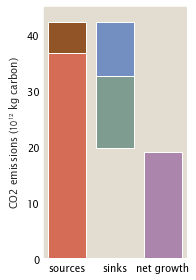

In [10]:
!mkdir -p figures/co2_budget
figure = plt.figure(figsize=(2.8, 4))

sources = ['fossil fuel and industry', 'land-use change emissions']
c_order = ['red', 'dark_brown']
bottom = np.zeros(1)
xs = [1]
for s, c in zip(sources, c_order):
    mask = current_co2_budget_df.desc == s
    vals = [current_co2_budget_df[mask]['value'].to_list()[0]]
    plt.bar(xs, vals, bottom=bottom, color=colors[c], width=0.8)
    bottom += vals

sinks = ['ocean sink', 'land sink']
c_order = ['blue', 'dark_green']
xs = [2]
for s, c in zip(sinks, c_order):
    mask = current_co2_budget_df.desc == s
    vals = [current_co2_budget_df[mask]['value'].to_list()[0]]
    bottom -= vals
    plt.bar(xs, vals, bottom=bottom, color=colors[c], width=0.8)
    
# Using their reported growth. 
# There is an accounting error of 5.37-5.16 = 0.21 Pg C! 
# Will not highlight in this format though. 
net_growth = 5.16 * 1/carbon_mass_fraction_co2
plt.bar([3], [net_growth], color=colors['purple'], width=0.8)
    
plt.xlim(0.5, 3.5)
plt.ylim(0, 45)
plt.ylabel('CO2 emissions ($10^{12}$ kg carbon)', fontsize=10)
plt.xticks([1, 2, 3], ['sources', 'sinks', 'net growth'])
plt.yticks(np.arange(0, 41, 10))
plt.tight_layout()

plt.savefig('figures/co2_budget/budget2018.png', dpi=300)
plt.savefig('figures/co2_budget/budget2018.svg')
plt.savefig('figures/co2_budget/budget2018.pdf')
plt.show()